In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e6
mu = 1e1
a = .2
p0 = 10.0
e0 = 0.7
iota0 = 0.
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 = 0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15
T = 0.001

# Generate trajectory using FEW package

In [7]:
# initialize trajectory class
fewtraj = EMRIInspiral(func="pn5")
#fewtraj = EMRIInspiral(func="SchwarzEccFlux")

# run trajectory
fewtrajdata = fewtraj(M, mu, a, p0, e0, Y0, T=T,dt=10)

# Generate traj using my calculations with 5PN fluxes

In [9]:
traj = PNTraj()
traj.dense_output=True
if a==0:
    a=1e-6
mytrajdata = traj(M,mu,a, p0,e0,Y0,T=T,npoints=50)

# Compare

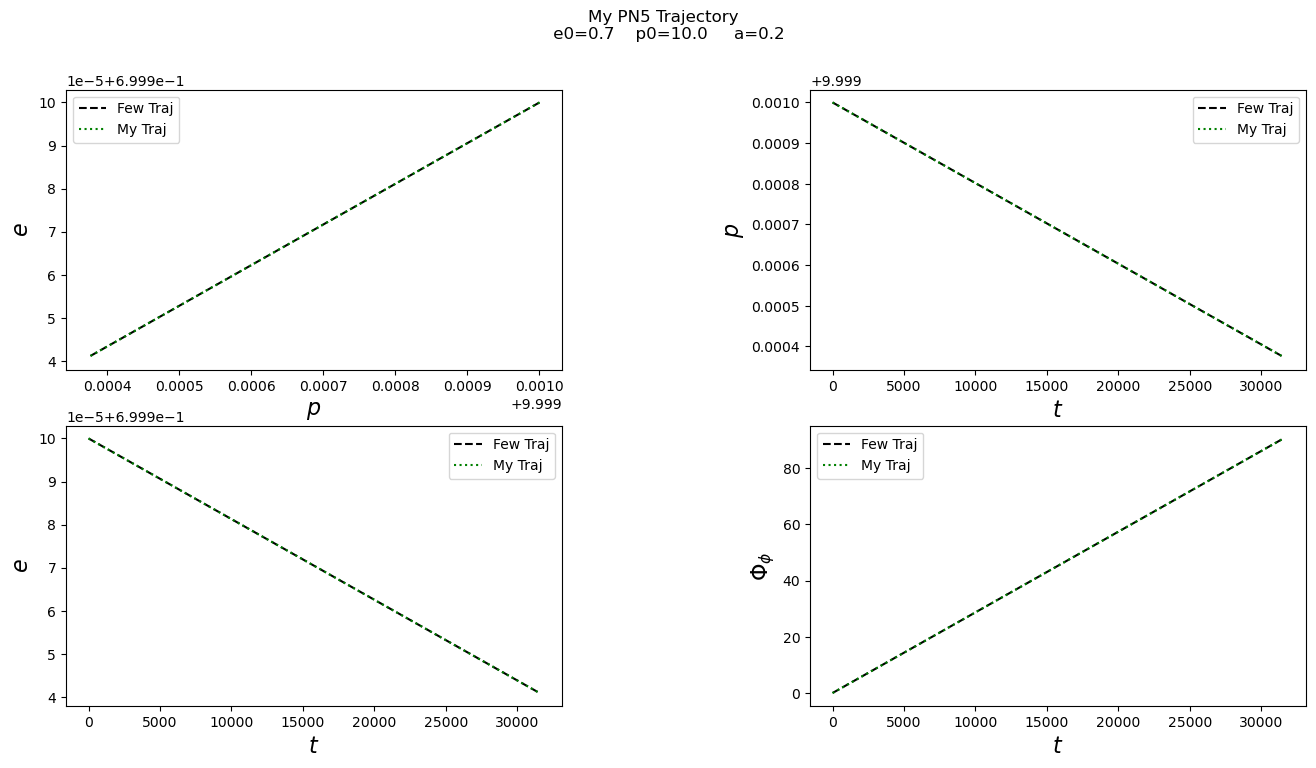

In [11]:
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5)
fig.set_size_inches(16, 8)
axes = axes.ravel()
ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$']
xlabels = [r'$p$', r'$t$', r'$t$',  r'$t$']
datlabel = ["Few Traj",  "My Traj"]
datcolors = ["black", "green", "blue", "yellow", "orange"]
datstyle= ["dashed", "dotted", "dashdot", "solid"]
xdata = [1,0,0,0]
ydata = [2,1,2,4]

data = [fewtrajdata,mytrajdata]
for inx,dat in enumerate(data):
    datstring = datlabel[inx]
    col = datcolors[inx]
    for i, (ax, xlab, ylab) in enumerate(zip(axes, xlabels, ylabels)):
        x = dat[xdata[i]]
        y = dat[ydata[i]]
        ax.plot(x, y, label=datstring,color=col, linestyle=datstyle[inx])
        ax.set_xlabel(xlab, fontsize=16)
        ax.set_ylabel(ylab, fontsize=16)
        ax.legend()
fig.suptitle("My PN5 Trajectory \n e0={0}    p0={1}     a={2}".format(e0,p0,a));

In [26]:
pran = np.arange(8,14,0.01)
pnran = [testpn(1e-5)(0,[i,0.7,0,0])[0] for i in pran]
traj = PN(1e6,10,bhspin=1e-6)
myran = [traj(0,[i,0.7,0,0])[0] for i in pran]

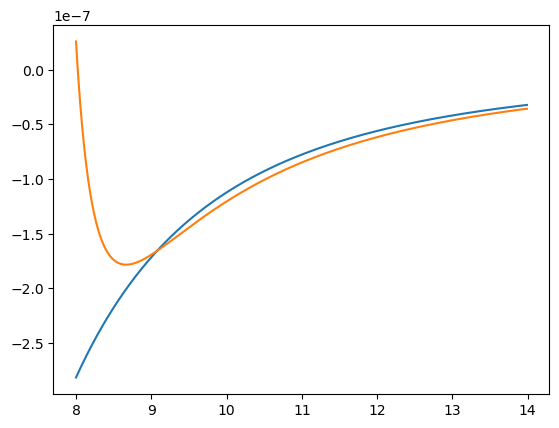

In [27]:
plt.plot(pran, myran)
plt.plot(pran,pnran)